In [1]:
%store -r columns_encoded
%store -r columns
%store -r data
%store -r data_encoded
%store -r data_with_genre_encoded
%store -r columns_with_genre_encoded

columns_encoded = columns_encoded
columns = columns
data = data
data_encoded = data_encoded
data_with_genre_encoded = data_with_genre_encoded
columns_with_genre_encoded = columns_with_genre_encoded

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)

In [3]:
columns_encoded

alter                                                                            Alter
sportlichkeit                           Als wie sportlich würdest du dich einschätzen?
ernaehrung                            Welche Rolle spielt für dich gesunde Ernährung? 
essengehen                                      Wie gerne gehst du Essen oder Trinken?
kochen                                                     Wie gerne kochst du selbst?
                                                            ...                       
genre_lieblingsmusiker_klassik               Genre Lieblingsmusiker Klassik? (encoded)
genre_lieblingsmusiker_pop                       Genre Lieblingsmusiker Pop? (encoded)
genre_lieblingsmusiker_r&b                       Genre Lieblingsmusiker R&B? (encoded)
genre_lieblingsmusiker_rap_hip_hop       Genre Lieblingsmusiker Rap Hip Hop? (encoded)
genre_lieblingsmusiker_rock                     Genre Lieblingsmusiker Rock? (encoded)
Length: 142, dtype: object

In [4]:
data_encoded.head()

,Alter,Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?","Wie sehr interessierst du dich für bildende Kunst wie\nMalen, Zeichnen oder Fotografie?",Wie gerne besuchst du Museen?,Wie sehr interessierst du dich für Videospiele?,Wie häufig nutzt du soziale Medien?,"Wie groß ist dein Interesse an Technologie und Innovation,\nwie beispielsweise Programmierung, Robotik und Virtual Reality?","Wie groß ist dein Interesse an Astronomie, Weltraumforschung\noder astronomiebezogenen Aktivitäten?","Wie groß ist dein Interesse an Naturwissenschaften\nwie Biologie, Chemie und Physik?",Wie sehr interessierst du sich für gesellschaftliches\nEngagement und Freiwilligenarbeit?,"Wie groß ist dein Interesse an sozialen Themen wie\nVielfalt, Gleichberechtigung und soziale Gerechtigkeit?",Würdest du dich selbst als introvertiert/extrovertiert\nbezeichnen?,"Hast du häufig Angst etwas zu verpassen, wenn du nicht\nunter Menschen bist?",Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [spontan],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [verwirrt],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [glücklich],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [geduldig],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [streitlustig],Wie … schätzt Du dich selbst ein? (1 gar nicht - 5\nsehr) [abenteuerlustig],"Hattest du schon einmal Zweifel daran, ob du dein Studium\nschaffen kannst?",Wie zufrieden bist du mit deinem Studium?,Strebst du nach dem Studium auch weiterhin eine akademische\nLaufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim\nWandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?,Interesse an Basketball? (encoded),Interesse an Bouldern/Klettern? (encoded),Interesse an Football? (encoded),Interesse an Fußball? (encoded),Interesse an Handball? (encoded),Interesse an Hockey? (encoded),Interesse an Kampfsport? (encoded),Interesse an Leichtathletik? (encoded),Interesse an Reiten? (encoded),Interesse an Rennrad/Mountainbike? (encoded),Interesse an Schwimmen? (encoded),Interesse an Tanzen? (encoded),Interesse an Tennis? (encoded),Interesse an Volleyball? (encoded),Interesse an Wassersport? (encoded),Interesse an Wintersport? (encoded),Interesse an Yoga? (encoded),Lieblingssportart Badminton? (encoded),Lieblingssportart Basketball? (encoded),Lieblingssportart Bogenschießen? (encoded),Lieblingssportart Bouldern? (encoded),Lieblingssportart Calisthenics? (encoded),Lieblingssportart E-Sport? (encoded),Lieblingssportart Fitness? (encoded),Lieblingssportart Football? (encoded),Lieblingssportart Fußball? (encoded),Lieblingssportart Hockey? (encoded),Lieblingssportart Inlineskaten? (encoded),Lieblingssportart Joggen? (encoded),Lieblingssportart Kampfsport? (encoded),Lieblingssportart Karate? (encoded),Lieblingssportart Keine Lieblingssportart? (encoded),Lieblingssportart Klettern? (encoded),Lieblingssportart Kraftsport? (encoded),Lieblingssportart Padel-Tennis? (encoded),Lieblingssportart Radfahren? (encoded),Lieblingssportart Reiten? (encoded),Lieblingssportart Ruderboot Fahren? (encoded),Lieblingssportart Schnorcheln? (encoded),Lieblingssportart Schwimmen? (encoded),Lieblingssportart Ski Fahren? (encoded),Lieblingssportart Squash? (encoded),Lieblingssportart Tanzen? (encoded),Lieblingssportart Tauchen? (encoded),Lieblingssportart Te

# Frage 1: Wie häufig nutzt du soziale Medien? (Regression & Klassifikation)
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um die Frage "" mithilfe der anderen Fragen zu schätzen. Da diese Frage sowohl als Regressions- als auch Klassifikationsproblem angesehen werden kann, nutzen wir Modelle für beide Varianten und vergleichen die Ergbnisse im Weiteren.

In [5]:
#Split label vom Rest der Daten
y_data_q1 = data_encoded[columns_encoded.social_media]
X_data_q1 = data_encoded.drop(columns_encoded.social_media, axis=1)

In [6]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(X_data_q1, y_data_q1, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix

## Suche nach dem besten Regressionsmodell

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

# Pipeline definieren
pipe_LR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

In [9]:
pipe_LR_q1.fit(X_train_q1, y_train_q1)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [10]:
prediction_LR_q1 = pipe_LR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_LR_q1)

1.0054503172390938

Text(0, 0.5, 'Predicted values')

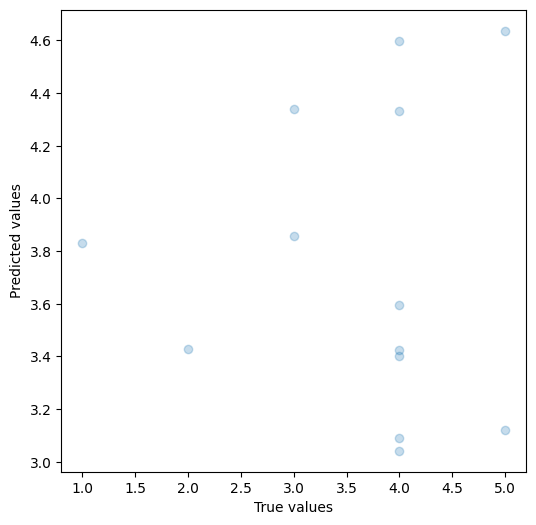

In [11]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_LR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### k-NN Regressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

# Pipeline definieren
pipe_kNNR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe_kNNR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [13]:
# Grid Search nach den besten Parametern für das Modell k-NN Regressor
grid_kNNR_q1 = GridSearchCV(estimator=pipe_kNNR_q1,
                   param_grid={
                     'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                     'model__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                     'model__leaf_size': [3, 10, 20, 30, 50, 100],
                     'model__p': [1, 2, 3],
                     'model__metric': ['minkowski', 'precomputed']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE")

grid_kNNR_q1.fit(X_data_q1, y_data_q1)

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1512 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/carlobeckmann/miniconda3/envs/data

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute',
                                              'auto'],
                         'model__leaf_size': [3, 10, 20, 30, 50, 100],
                         'model__metric': ['minkowski', 'precomputed'],
                         'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                         'model__p': [1, 2, 3]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)})

In [14]:
prediction_kNNR_q1 = grid_kNNR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_kNNR_q1)

0.5769230769230769

Text(0, 0.5, 'Predicted values')

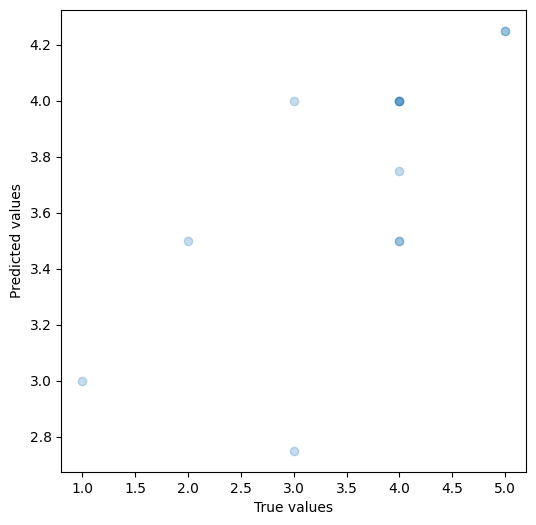

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_kNNR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

pipe_RFR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestRegressor())
])

pipe_RFR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 1.0,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [17]:
grid_RFR_q1 = GridSearchCV(estimator=pipe_RFR_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFR_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.1s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [18]:
prediction_RFR_q1 = grid_RFR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_RFR_q1)

0.7723076923076924

Text(0, 0.5, 'Predicted values')

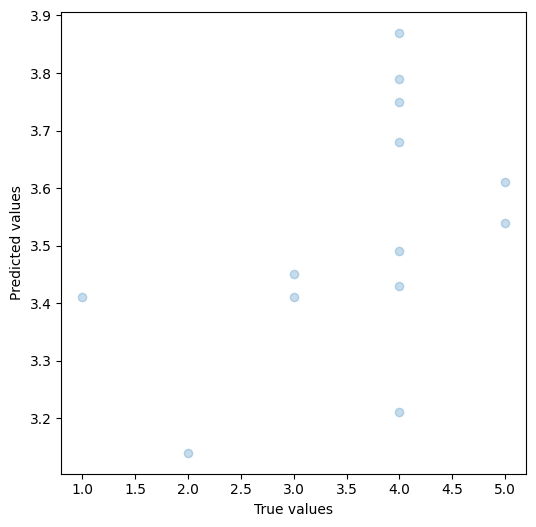

In [19]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_RFR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Gradient Boosting Regressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_GBR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingRegressor(loss='absolute_error'))
])

pipe_GBR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingRegressor(loss='absolute_error'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingRegressor(loss='absolute_error'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__alpha': 0.9,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'absolute_error',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [21]:
grid_GBR_q1 = GridSearchCV(estimator=pipe_GBR_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBR_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(loss='absolute_error'))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [22]:
prediction_GBR_q1 = grid_GBR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_GBR_q1)

0.8628187484371916

Text(0, 0.5, 'Predicted values')

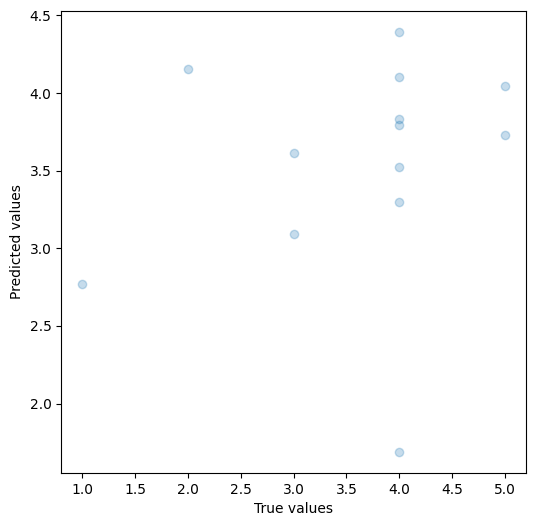

In [23]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_GBR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Ergebnis:

## Suche nach dem besten Klassifikationsmodell

### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

pipe_RFC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipe_RFC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [25]:
grid_RFC_q1 = GridSearchCV(estimator=pipe_RFC_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

Text(33.22222222222222, 0.5, 'True labels')

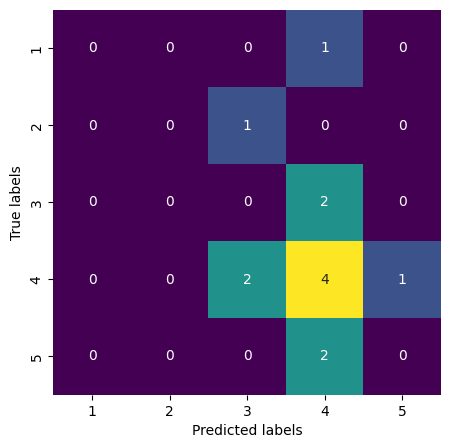

In [26]:
prediction_RFC_q1 = grid_RFC_q1.predict(X_test_q1)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_RFC_q1, labels=grid_RFC_q1.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [27]:
mean_absolute_error(y_test_q1, prediction_RFC_q1)

0.8461538461538461

Text(0, 0.5, 'Predicted values')

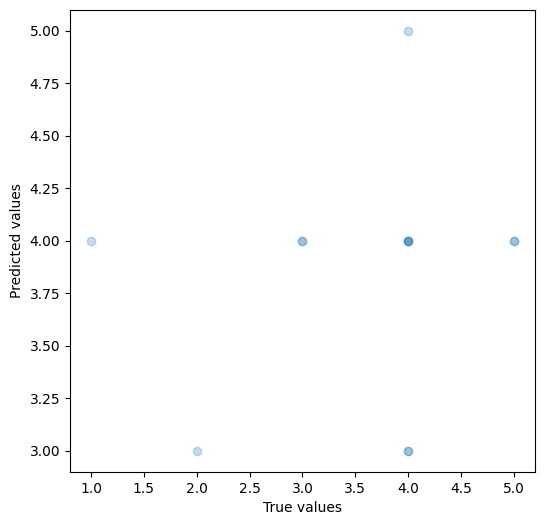

In [28]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_RFC_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### k-NN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

pipe_kNNC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

pipe_kNNC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [30]:
grid_kNNC_q1 = GridSearchCV(estimator=pipe_kNNC_q1,
                   param_grid={
                      'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                      'model__leaf_size': [5, 15, 30, 50, 100, 200],
                      'model__p': [1, 2, 4],
                      'model__weights': ['uniform', 'distance']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_kNNC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform;

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_nei

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [5, 15, 30, 50, 100, 200],
                         'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                         'model__p': [1, 2, 4],
                         'model__weights': ['uniform', 'distance']},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

Text(33.22222222222222, 0.5, 'True labels')

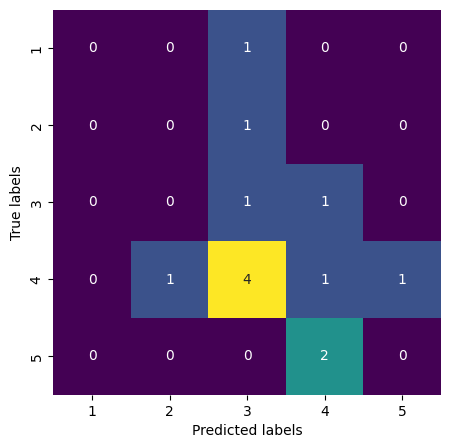

In [31]:
prediction_kNNC_q1 = grid_kNNC_q1.predict(X_test_q1)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_kNNC_q1, labels=grid_RFC_q1.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [32]:
mean_absolute_error(y_test_q1, prediction_kNNC_q1)

1.0

Text(0, 0.5, 'Predicted values')

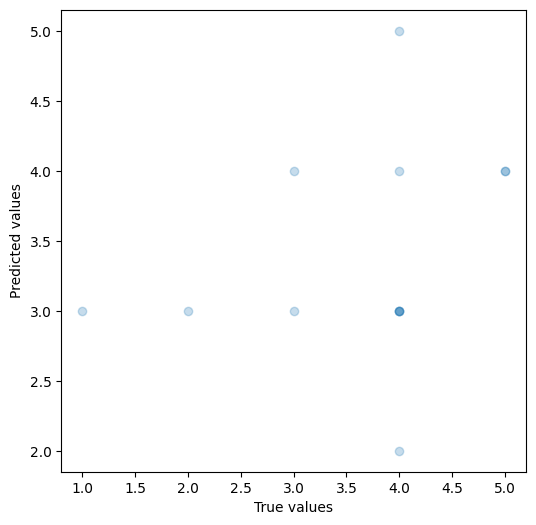

In [33]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_kNNC_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_GBC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingClassifier())
])

pipe_GBC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [35]:
grid_GBC_q1 = GridSearchCV(estimator=pipe_GBC_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, mo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

Text(33.22222222222222, 0.5, 'True labels')

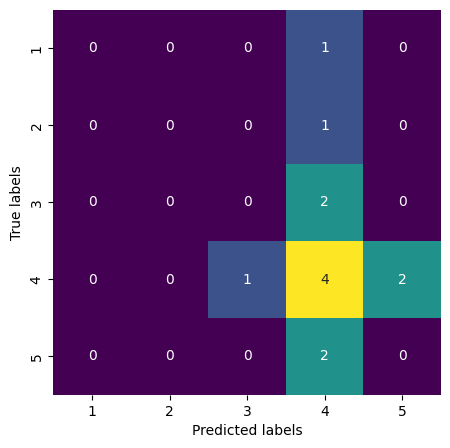

In [36]:
prediction_GBC_q1 = grid_GBC_q1.predict(X_test_q1)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_GBC_q1, labels=grid_RFC_q1.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [37]:
mean_absolute_error(y_test_q1, prediction_GBC_q1)

0.9230769230769231

Text(0, 0.5, 'Predicted values')

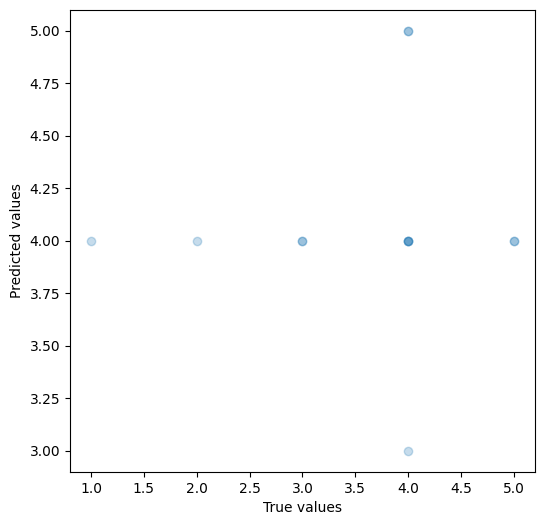

In [38]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_GBC_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Ergebnis:


## Bestes Modell für Frage 1

# Frage 2: Was ist deine Lieblingsgenre anhand von Lieblingsband bzw. Lieblings-Musiker*in? (Klassifikation)
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um die Frage "Was ist deine Lieblingsgenre anhand von Lieblingsband bzw. Lieblings-Musiker*in?" mithilfe der anderen Fragen zu schätzen. Dafür werden verschiedene Klassifikationsmodelle von uns verglichen, um das beste Modell zu ermitteln.

In [39]:
#Split label vom Rest der Daten
y_data_q2 = data_with_genre_encoded[columns_with_genre_encoded.genre_lieblingsmusiker]
X_data_q2 = data_with_genre_encoded.drop(columns_with_genre_encoded.genre_lieblingsmusiker, axis=1)

In [40]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_data_q2, y_data_q2, test_size=0.2, random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

pipe_RFC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipe_RFC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [43]:
grid_RFC_q2 = GridSearchCV(estimator=pipe_RFC_q2,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   cv=3, verbose=2)

grid_RFC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             verbose=2)

Text(33.081597222222214, 0.5, 'True labels')

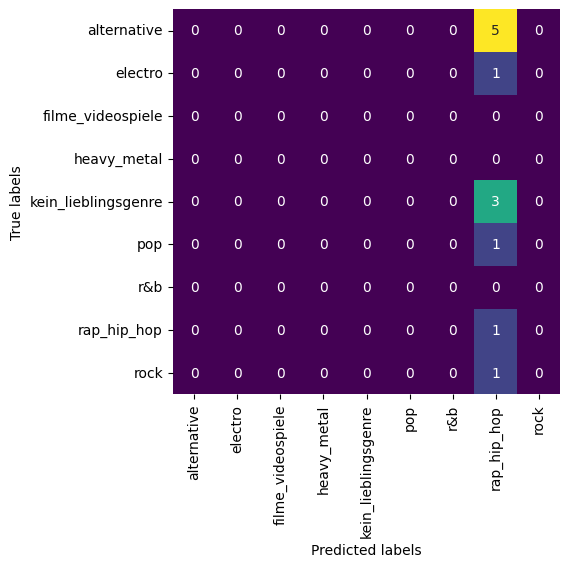

In [44]:
prediction_RFC_q2 = grid_RFC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_RFC_q2, labels=grid_RFC_q2.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### k-NN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

pipe_kNNC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

pipe_kNNC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [46]:
grid_kNNC_q2 = GridSearchCV(estimator=pipe_kNNC_q2,
                   param_grid={
                      'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                      'model__leaf_size': [5, 15, 30, 50, 100, 200],
                      'model__p': [1, 2, 4],
                      'model__weights': ['uniform', 'distance']

                   },
                   cv=3, verbose=2)

grid_kNNC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform;

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neig

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [5, 15, 30, 50, 100, 200],
                         'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                         'model__p': [1, 2, 4],
                         'model__weights': ['uniform', 'distance']},
             verbose=2)

Text(33.081597222222214, 0.5, 'True labels')

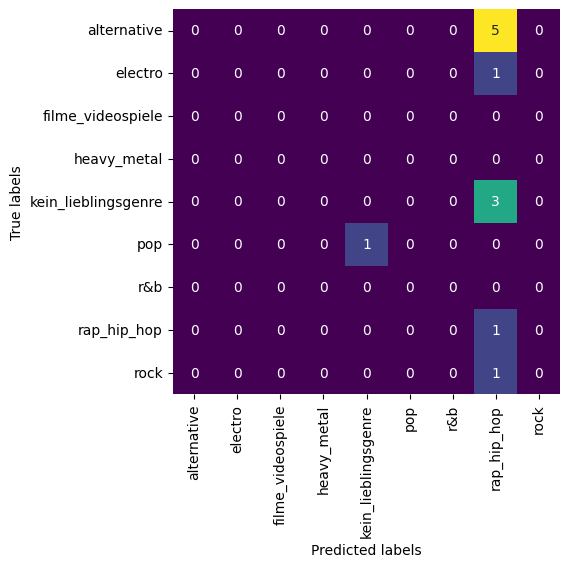

In [47]:
prediction_kNNC_q2 = grid_kNNC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_kNNC_q2, labels=grid_RFC_q2.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_GBC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingClassifier())
])

pipe_GBC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [49]:
grid_GBC_q2 = GridSearchCV(estimator=pipe_GBC_q2,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   cv=3, verbose=2)

grid_GBC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             verbose=2)

Text(33.081597222222214, 0.5, 'True labels')

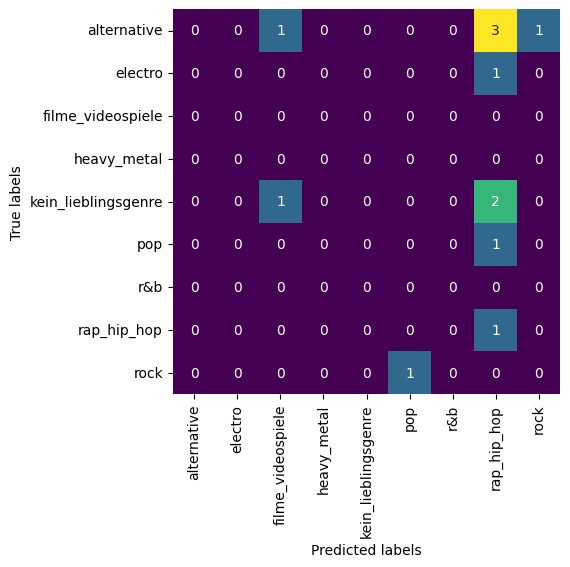

In [50]:
prediction_GBC_q2 = grid_GBC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_GBC_q2, labels=grid_RFC_q2.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### Ergebnis:


## Bestes Modell für Frage 2

# Frage 3: Alter? (Regression)
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um das Alter mithilfe der anderen Fragen zu schätzen. Dafür werden verschiedene Regressionsmodelle von uns verglichen, um das beste Modell zu ermitteln.

In [51]:
#Split label vom Rest der Daten

y_data_q3 = data_encoded[columns_encoded.alter]
X_data_q3 = data_encoded.drop(columns_encoded.alter, axis=1)

In [52]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train_q3, X_test_q3, y_train_q3, y_test_q3 = train_test_split(X_data_q3, y_data_q3, test_size=0.2, random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

# Pipeline definieren
pipe_LR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

In [55]:
pipe_LR_q3.fit(X_train_q3, y_train_q3)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [56]:
prediction_LR_q3 = pipe_LR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_LR_q3)

3.365734929943194

Text(0, 0.5, 'Predicted values')

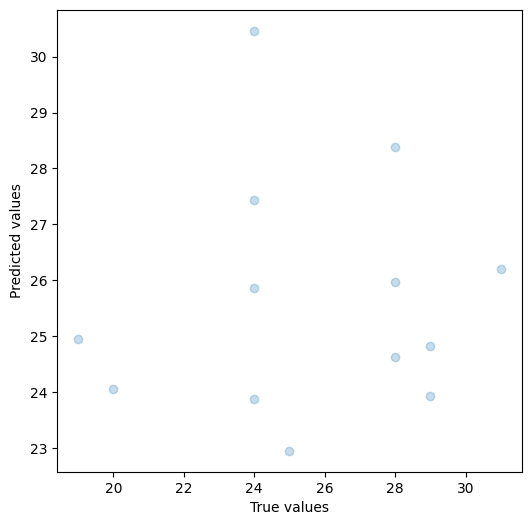

In [57]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_LR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### k-NN Regressor

In [58]:
from sklearn.neighbors import KNeighborsRegressor

# Pipeline definieren
pipe_kNNR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe_kNNR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [59]:
# Grid Search nach den besten Parametern für das Modell k-NN Regressor
grid_kNNR_q3 = GridSearchCV(estimator=pipe_kNNR_q3,
                   param_grid={
                     'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                     'model__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                     'model__leaf_size': [3, 10, 20, 30, 50, 100],
                     'model__p': [1, 2, 3],
                     'model__metric': ['minkowski', 'precomputed']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE")

grid_kNNR_q3.fit(X_data_q3, y_data_q3)

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1512 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/carlobeckmann/miniconda3/envs/data

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute',
                                              'auto'],
                         'model__leaf_size': [3, 10, 20, 30, 50, 100],
                         'model__metric': ['minkowski', 'precomputed'],
                         'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                         'model__p': [1, 2, 3]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)})

In [60]:
prediction_kNNR_q3 = grid_kNNR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_kNNR_q3)

2.492307692307693

Text(0, 0.5, 'Predicted values')

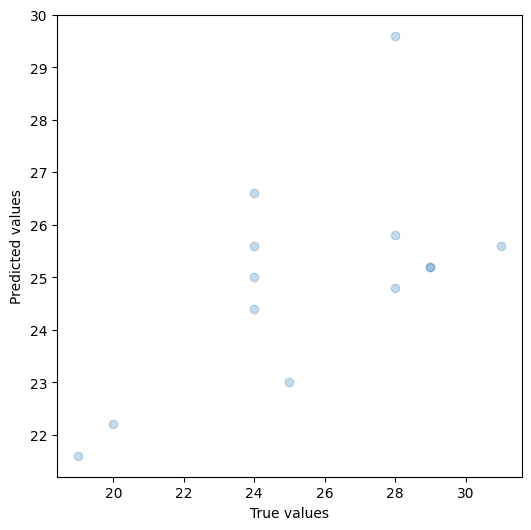

In [61]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_kNNR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

pipe_RFR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestRegressor())
])

pipe_RFR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 1.0,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [63]:
grid_RFR_q3 = GridSearchCV(estimator=pipe_RFR_q3,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFR_q3.fit(X_train_q3, y_train_q3)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [64]:
prediction_RFR_q3 = grid_RFR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_RFR_q3)

3.448559539461608

Text(0, 0.5, 'Predicted values')

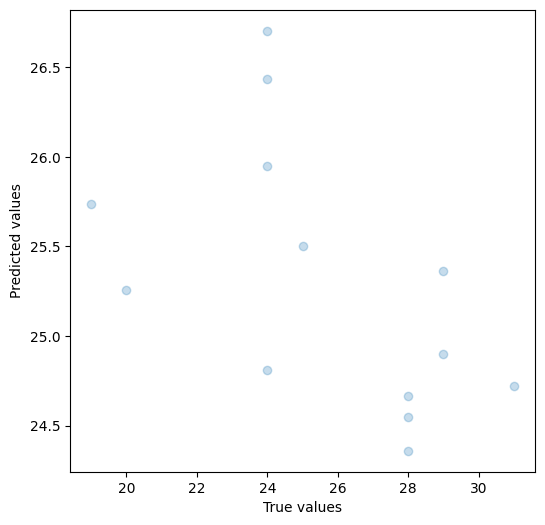

In [65]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_RFR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Gradient Boosting Regressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_GBR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingRegressor(loss='absolute_error'))
])

pipe_GBR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingRegressor(loss='absolute_error'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingRegressor(loss='absolute_error'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__alpha': 0.9,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'absolute_error',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [67]:
grid_GBR_q3 = GridSearchCV(estimator=pipe_GBR_q3,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBR_q3.fit(X_train_q3, y_train_q3)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(loss='absolute_error'))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

In [68]:
prediction_GBR_q3 = grid_GBR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_GBR_q3)

2.9256228429357813

Text(0, 0.5, 'Predicted values')

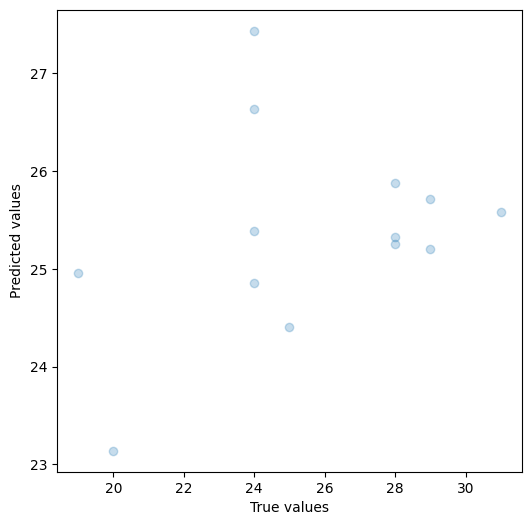

In [69]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_GBR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

### Ergebnis:

## Bestes Modell für Frage 3